 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, parse_dates = True)
#whale_returns["Date"] = whale_returns["Date"].astype("string")
whale_returns["Date"] = pd.to_datetime(whale_returns["Date"])
whale_returns = whale_returns.set_index("Date")
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull()
whale_returns.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
whale_returns.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, parse_dates = True)
#algo_returns["Date"] = algo_returns["Date"].astype("string")
algo_returns["Date"] = pd.to_datetime(algo_returns["Date"])
algo_returns = algo_returns.set_index("Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull()
algo_returns.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Drop nulls
algo_returns.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_returns_path, parse_dates = True)
sp500_returns["Date"] = pd.to_datetime(sp500_returns["Date"])
#sp500_returns["Date"] = sp500_returns["Date"].astype("string")
sp500_returns = sp500_returns.set_index("Date")

sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix data types

sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "")
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
sp500_returns.dtypes


/var/folders/0q/67bkw2q56jd2bn1g3bp8y9ww0000gn/T/ipykernel_29116/3463959295.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp_percent_change = sp500_returns.pct_change()
sp_percent_change.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp_percent_change.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_percent_change.rename(columns={"Close":"S&P Closing Price"}, inplace=True)
sp_percent_change.dropna()
sp_percent_change.rename(columns={"Close":"S&P Closing Price"}, inplace=True)
sp_percent_change

,S&P Closing Price
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

all_returns = pd.concat([whale_returns, algo_returns, sp_percent_change], axis = 'columns', join = 'inner')
all_returns.sort_index(ascending = True, inplace = True)
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Closing Price
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

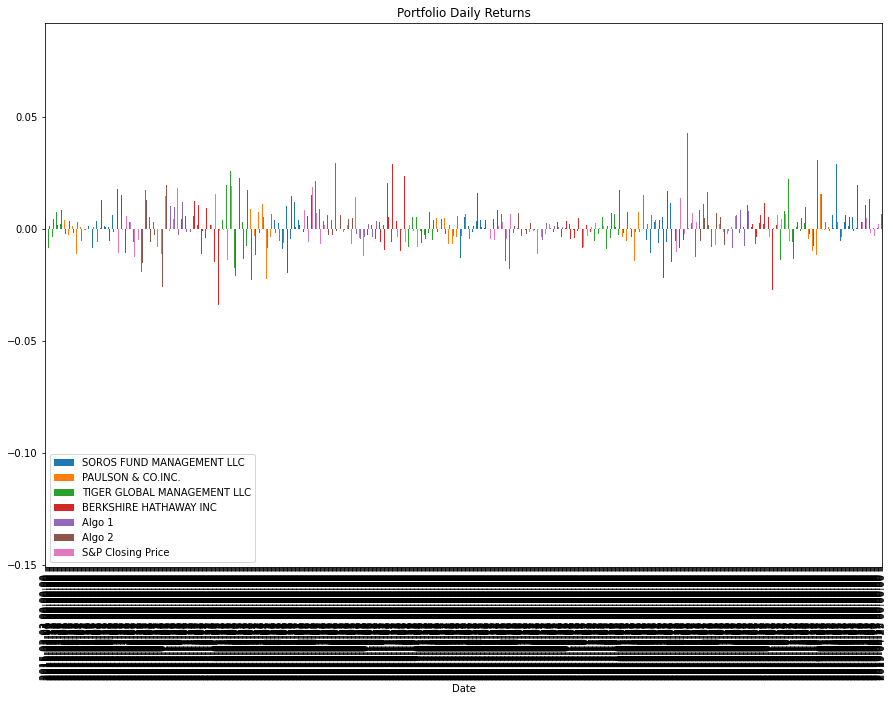

In [15]:
# Plot daily returns of all portfolios
all_returns.plot(kind ='bar', title = "Portfolio Daily Returns", figsize = (15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Return of Portfolio'}, xlabel='Date'>

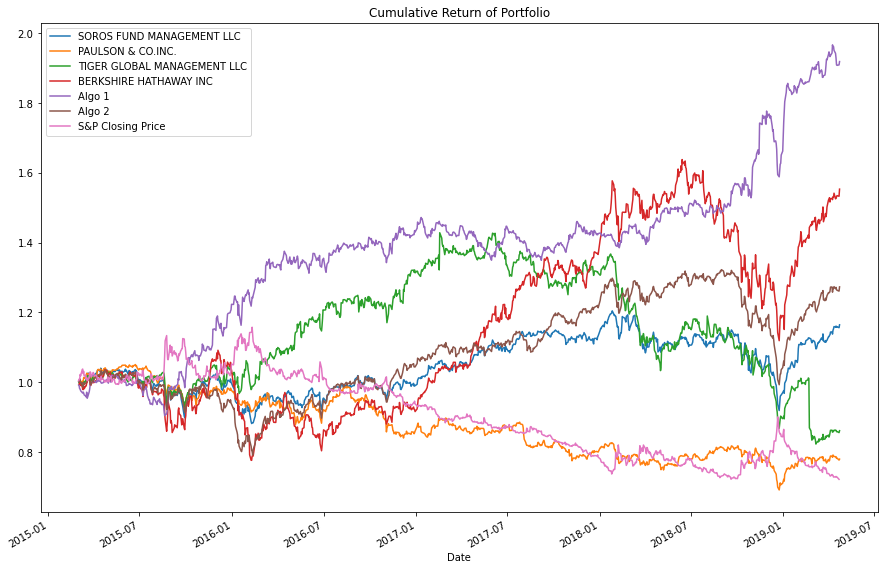

In [16]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + all_returns).cumprod()
cum_returns.head()
# Plot cumulative returns
cum_returns.plot(title = "Cumulative Return of Portfolio", figsize = (15, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'S&P Returns'}>

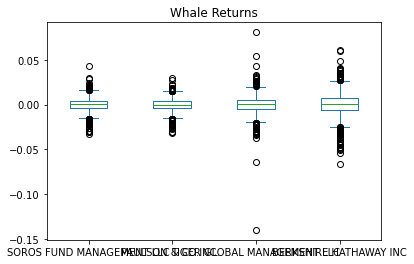

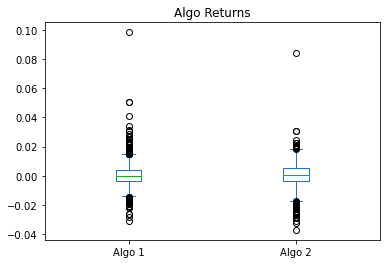

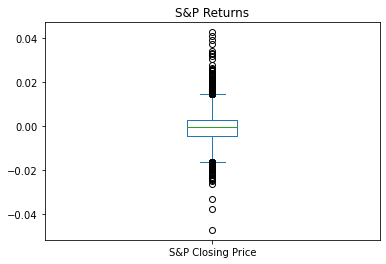

In [17]:
# Box plot to visually show risk
whale_returns.plot.box(title='Whale Returns') 
algo_returns.plot.box(title='Algo Returns') 
sp_percent_change.plot.box(title='S&P Returns')

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_returns.std()
algo_std = algo_returns.std()
print(whale_std)
print(algo_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo 1    0.007972
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp_std = sp_percent_change.std()
print(sp_std)
# Determine which portfolios are riskier than the S&P 500
#Tiger Global Management, Berkshire Hathway, Algo 2 are the most risky. 

S&P Closing Price    0.008135
dtype: float64


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
whale_annualized_std = whale_std * np.sqrt(252)
algo_annualized_std = algo_std * np.sqrt(252)
sp_annualized_std = sp_std * np.sqrt(252)
print(whale_annualized_std)
print(algo_annualized_std)
print(sp_annualized_std)


SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64
Algo 1    0.126558
Algo 2    0.134401
dtype: float64
S&P Closing Price    0.129133
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:ylabel='Frequency'>

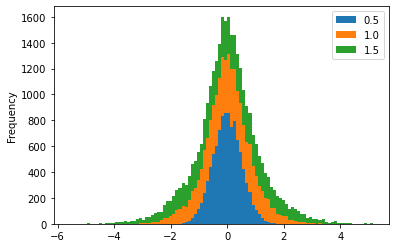

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_rolling_std = whale_std.rolling(window=21).std()
algo_rolling_std = algo_std.rolling(window=21).std()
sp_rolling_std = sp_std.rolling(window=21).std()
# Plot the rolling standard deviation
whale_rolling_std = np.random.normal(scale=0.5, size=10000)
algo_rolling_std = np.random.normal(scale=1.0, size=10000)
sp_rolling_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": whale_rolling_std,
    "1.0": algo_rolling_std,
    "1.5": sp_rolling_std
})

portfolio_std.plot.hist(stacked=True, bins=100)



### Calculate and plot the correlation

In [22]:
# Calculate the correlation
portfolio_corr = portfolio_std.corr()

# Display de correlation matrix
portfolio_corr

,0.5,1.0,1.5
0.5,1.000000,0.001962,0.001547
1.0,0.001962,1.000000,-0.006162
1.5,0.001547,-0.006162,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

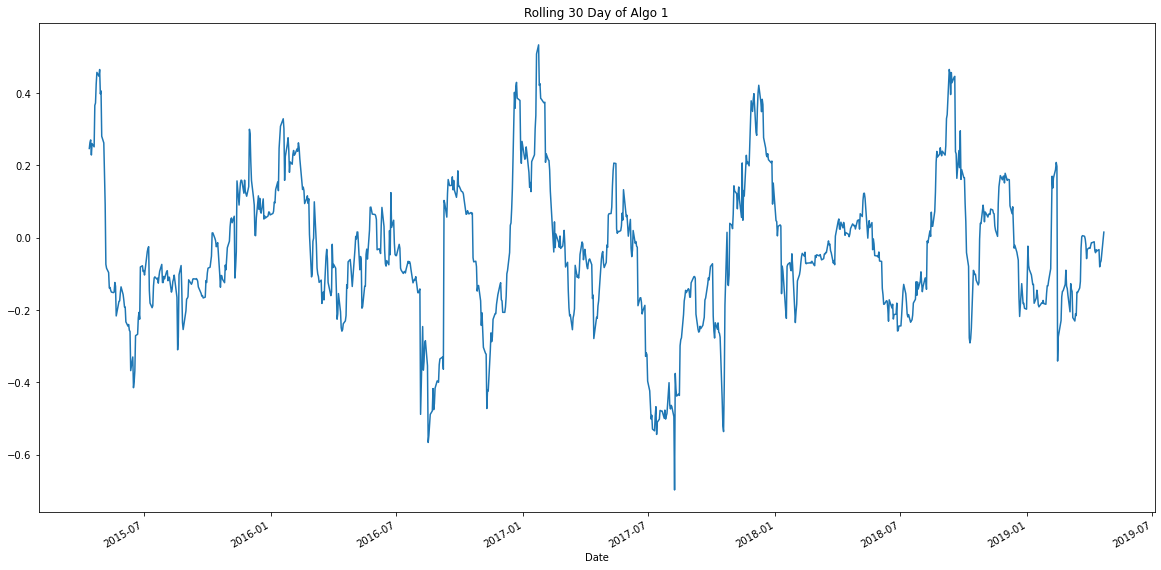

In [23]:
# Calculate covariance of a single portfolio
co_variance_of_whale = all_returns["Algo 1"].cov(all_returns["S&P Closing Price"])

# Calculate variance of S&P 500
var_sp500 = all_returns["S&P Closing Price"].var()

# Computing beta
algo1_beta = co_variance_of_whale/var_sp500
# Plot beta trend
rolling_algo1_covariance = all_returns["Algo 1"].rolling(window=30).cov(all_returns["S&P Closing Price"])
rolling_sp500_var = all_returns["S&P Closing Price"].rolling(window=30).var()

rolling_algo1_beta = rolling_algo1_covariance/rolling_sp500_var

ax = rolling_algo1_beta.plot(figsize=(20,10), title="Rolling 30 Day of Algo 1")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

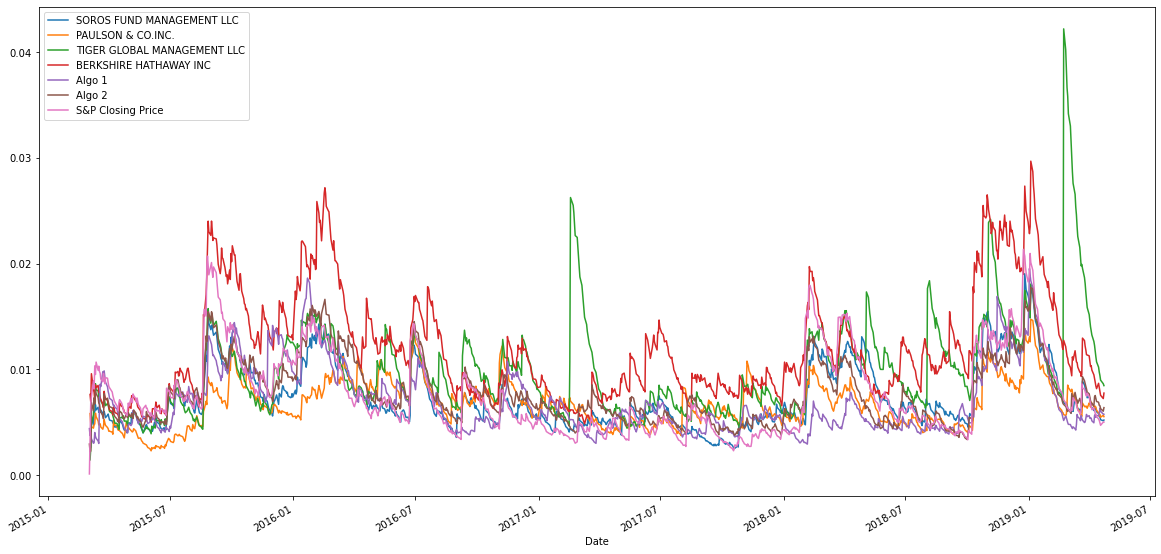

In [24]:
# Use `ewm` to calculate the rolling window
ewm_all_returns = all_returns.ewm(span=21).std().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_all_returns = (all_returns.mean()*252)/(all_returns.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Portfolio'}>

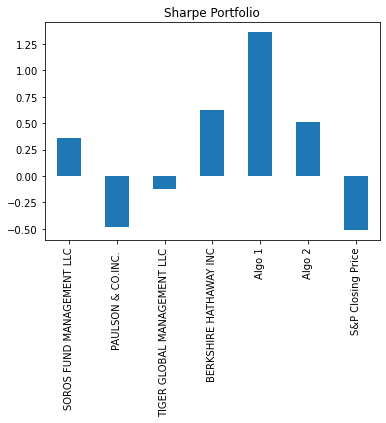

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_all_returns.plot(kind='bar', title='Sharpe Portfolio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Algo 1 outperforms both the whales and the S&P but Algo 2 performs better than the S&P and all whales minus Berkshire Hathaway Inc.. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
readcsv = Path("../Starter_Code/Resources/AAPL_stockdata.csv")
aapl_data = pd.read_csv(readcsv, parse_dates = True)
aapl_data = aapl_data.set_index('Date')
aapl_data.rename(columns={"Close":"AAPL Closing Price"}, inplace=True)
aapl_data.drop(columns={'Open', 'High', 'Low', 'Volume'}, inplace = True)
aapl_data.head()

,AAPL Closing Price
Date,
08/09/2022,164.92
08/08/2022,164.87
08/05/2022,165.35
08/04/2022,165.81
08/03/2022,166.13


In [28]:
# Reading data from 2nd stock
readcsv = Path("../Starter_Code/Resources/BABA_stockdata.csv")
baba_data = pd.read_csv(readcsv, parse_dates = True)
baba_data = baba_data.set_index('Date')
baba_data.rename(columns={'Close': 'BABA Closing Price'}, inplace = True)
baba_data.drop(columns={'Open', 'High', 'Low', 'Volume'}, inplace = True)
baba_data.head()

,BABA Closing Price
Date,
08/09/2022,91.19
08/08/2022,90.84
08/05/2022,92.56
08/04/2022,97.43
08/03/2022,95.72


In [29]:
# Reading data from 3rd stock
readcsv = Path("../Starter_Code/Resources/NVAX_stockdata.csv")
nvax_data = pd.read_csv(readcsv, parse_dates = True)
nvax_data = nvax_data.set_index('Date')
nvax_data.rename(columns={'Close': 'NVAX Closing Price'}, inplace = True)
nvax_data.drop(columns={'Open', 'High', 'Low', 'Volume'}, inplace = True)
nvax_data.head()


,NVAX Closing Price
Date,
08/09/2022,40.28
08/08/2022,57.25
08/05/2022,60.27
08/04/2022,61.93
08/03/2022,61.11


In [30]:
# Combine all stocks in a single DataFrame


stocks_combined = pd.concat([aapl_data, baba_data, nvax_data], axis = 'columns', join = 'inner')
stocks_combined.sort_index(ascending = True, inplace = True)

In [31]:
# Reset Date index


stocks_combined.head()

,AAPL Closing Price,BABA Closing Price,NVAX Closing Price
Date,,,
01/03/2022,182.01,120.38,142.90
01/04/2022,179.70,119.56,138.45
01/05/2022,174.92,121.16,122.41
01/06/2022,172.00,126.63,121.50
01/07/2022,172.17,129.81,126.70


In [32]:
# Reorganize portfolio data by having a column per symbol
# Already completed in code above 

In [33]:
# Calculate daily returns
stocks_combined_returns = stocks_combined.pct_change()
# Drop NAs
daily_returns_combined = stocks_combined_returns.dropna()
# Display sample data
daily_returns_combined.head()

,AAPL Closing Price,BABA Closing Price,NVAX Closing Price
Date,,,
01/04/2022,-0.012692,-0.006812,-0.031141
01/05/2022,-0.026600,0.013382,-0.115854
01/06/2022,-0.016693,0.045147,-0.007434
01/07/2022,0.000988,0.025113,0.042798
01/10/2022,0.000116,-0.011632,0.065430


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_combined.dot(weights)
portfolio_returns.sort_index(ascending=True, inplace=True)


# Display sample data
portfolio_returns.head()

Date
01/04/2022   -0.016881
01/05/2022   -0.043024
01/06/2022    0.007007
01/07/2022    0.022966
01/10/2022    0.017971
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
portfolio = pd.concat([daily_returns_combined, portfolio_returns], axis='columns', join='inner')

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio = portfolio.dropna()
portfolio.sort_index(ascending=True, inplace=True)
portfolio.rename(columns={0:'Portfolio Return'}, inplace=True)
portfolio.head()

,AAPL Closing Price,BABA Closing Price,NVAX Closing Price,Portfolio Return
Date,,,,
01/04/2022,-0.012692,-0.006812,-0.031141,-0.016881
01/05/2022,-0.026600,0.013382,-0.115854,-0.043024
01/06/2022,-0.016693,0.045147,-0.007434,0.007007
01/07/2022,0.000988,0.025113,0.042798,0.022966
01/10/2022,0.000116,-0.011632,0.065430,0.017971


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std'
daily_std = portfolio.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()


AAPL Closing Price    0.368056
BABA Closing Price    1.859011
NVAX Closing Price    5.617920
Portfolio Return      2.390658
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

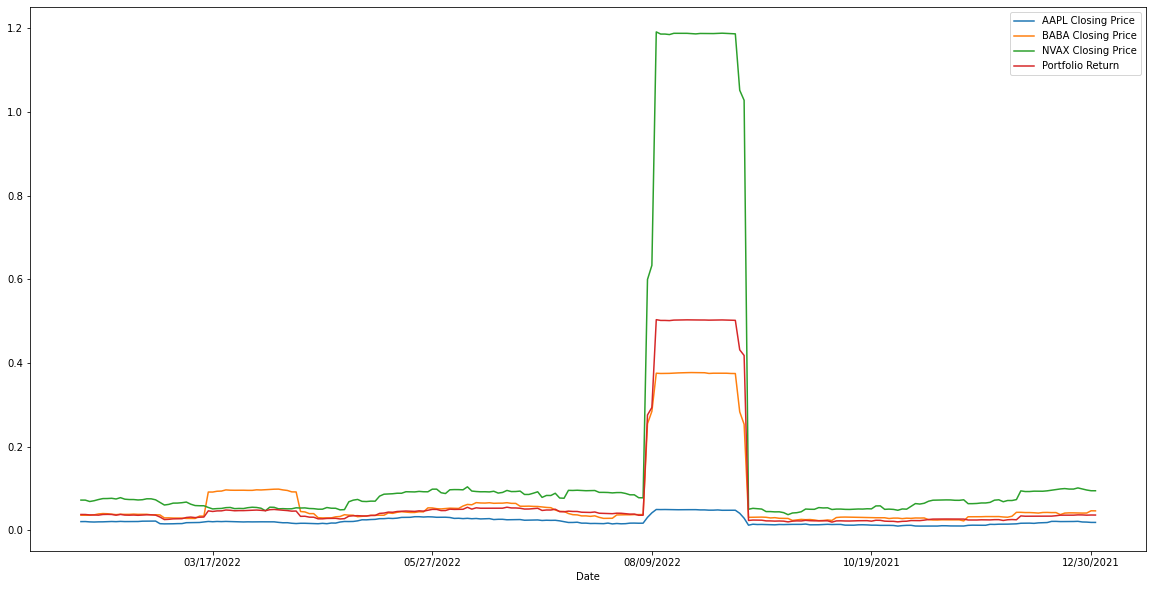

In [38]:
# Calculate rolling standard deviation
portfolio.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
correlation_portfolio = portfolio.corr()
correlation_portfolio

,AAPL Closing Price,BABA Closing Price,NVAX Closing Price,Portfolio Return
AAPL Closing Price,1.000000,-0.375801,-0.405257,-0.363535
BABA Closing Price,-0.375801,1.000000,0.884497,0.932759
NVAX Closing Price,-0.405257,0.884497,1.000000,0.991784
Portfolio Return,-0.363535,0.932759,0.991784,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

,AAPL Closing Price,BABA Closing Price,NVAX Closing Price,Portfolio Return,S&P Closing Price
Date,,,,,
01/04/2022,-0.012692,-0.006812,-0.031141,-0.016881,0.019578
01/05/2022,-0.026600,0.013382,-0.115854,-0.043024,0.000940
01/06/2022,-0.016693,0.045147,-0.007434,0.007007,0.003969
01/07/2022,0.000988,0.025113,0.042798,0.022966,0.001246
01/10/2022,0.000116,-0.011632,0.065430,0.017971,-0.009026


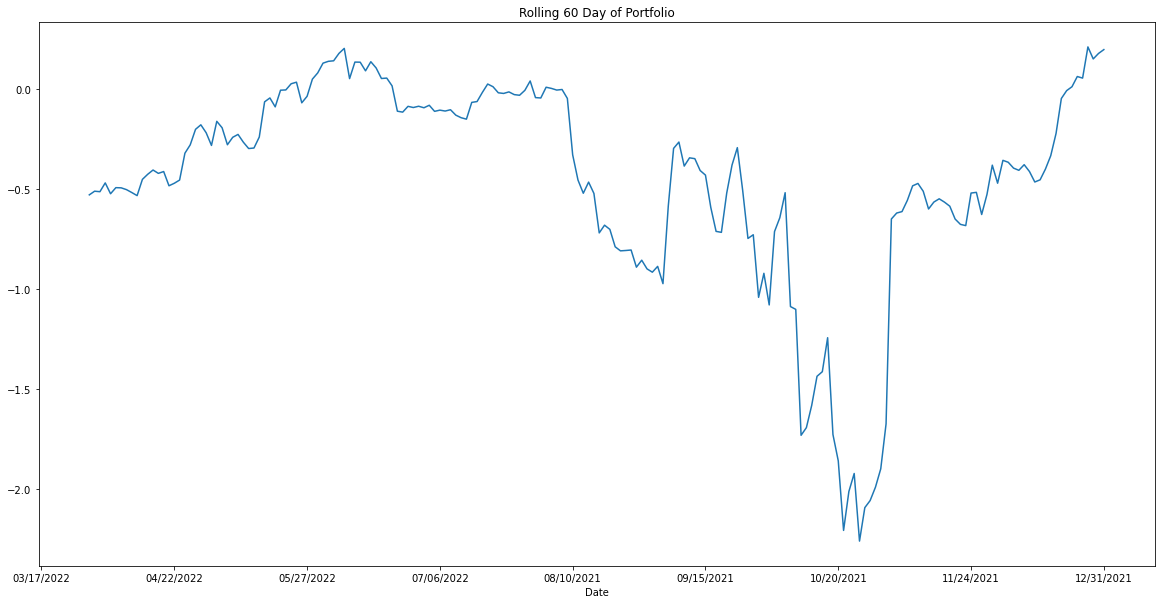

In [40]:

readcsv = Path("../Starter_Code/Resources/SPY.csv")
sp500_bench = pd.read_csv(readcsv, parse_dates = True)
sp500_bench = sp500_bench.set_index('Date')
sp500_bench.rename(columns={'Close': 'S&P Closing Price'}, inplace = True)
sp500_bench.drop(columns={'Open', 'High', 'Low', 'Volume'}, inplace = True)
sp500_bench.head()
# Calculate daily returns
sp500_bench_returns = sp500_bench.pct_change()
#sp500_bench["S&P Closing Price"] = sp500_bench["S&P Closing Price"].astype(float)

# Drop NAs
sp500_bench_returns = sp500_bench_returns.dropna()
# Display sample data
sp500_bench_returns.head()

portfolio_compared = pd.concat([portfolio, sp500_bench_returns], axis = 'columns', join = 'inner')
portfolio_compared.sort_index(ascending = True, inplace = True)

# Calculate and plot data
co_variance_of_portfolio = portfolio_compared['Portfolio Return'].cov(portfolio_compared['S&P Closing Price'])

# Calculate Variance of S&P
var_sp500 = portfolio_compared['S&P Closing Price'].var()

# Computing Beta
portfolio_beta = co_variance_of_portfolio/var_sp500

# Plot Beta Trend
rolling_portfolio_co = portfolio_compared['Portfolio Return'].rolling(window=60).cov(portfolio_compared['S&P Closing Price'])
rolling_sp_var = portfolio_compared['S&P Closing Price'].rolling(window=60).var()

rolling_portfolio_beta = rolling_portfolio_co/rolling_sp_var
ax = rolling_portfolio_beta.plot(figsize=(20,10), title="Rolling 60 Day of Portfolio")
portfolio_compared.head()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((portfolio_compared.mean()-portfolio_compared['S&P Closing Price'].mean()) *252) / (portfolio_compared.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratio'}>

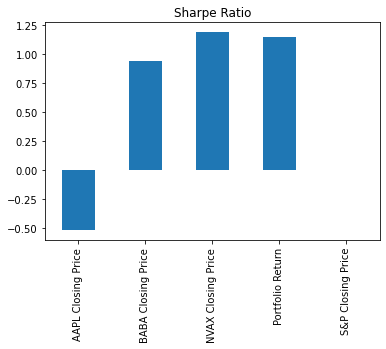

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [ ]:
# My portfolio overall has a good sharpe ratio with decent returns compared to the risk. 